# Cell distinction by adding a feature (koordinates) to existing KMeans code using HeLa images
By adding this feature it is possible to differentiate between different cells 

Author: Jonas Schenker

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os # To save images
from matplotlib import colors # To convert image models
import cv2 as cv2 # To apply filters
from scipy.optimize import curve_fit # To optimize elbow plot

In [3]:

from Functions.CellDistinction import preprocess_gray_with_coords
from Functions.FinalKMeans import init_centroids
from Functions.FinalKMeans import assign_to_centroids
from Functions.FinalKMeans import update_centroids
from Functions.CellDistinction import reconstruct_colored_segmentation
from Functions.CellDistinction import reconstruct_colored_segmentation_mask
from Functions.FinalKMeans import save_image
from Functions.FinalKMeans import save_image_universal
from Functions.CellDistinction import kmeans_with_coords
from Functions.Datenvorbereitung import apply_median_filter 
from Functions.CellDistinction import elbow_method_with_coords
from Functions.FinalKMeans import plot_elbow_method
from Functions.FinalKMeans import find_elbow

In [4]:
gray_t13 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))
gray_t52 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t52.tif'))
gray_t75 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t75.tif'))
gray_t79 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t79.tif'))

With some try and error we found out that using k=13 works pretty good with an intensity weight of 2 (to get the same weight of coordinates and intensity)

In [5]:
#centroids_gray_t13_median, labels_gray_t13_median, differentiated_gray_t13_median = kmeans_with_coords(gray_t13_median, k=39, init_method='kmeans++', intensity_weight=0.5, mask_usage=True)
centroids_gray_t13, labels_gray_t13, differentiated_gray_t13 = kmeans_with_coords(gray_t13, k=13, init_method='kmeans++', intensity_weight=2, mask_usage=True)
#centroids_gray_t52, labels_gray_t52, differentiated_gray_t52 = kmeans_with_coords(gray_t52, k=5, init_method='kmeans++', intensity_weight=2)
#centroids_gray_t75, labels_gray_t75, differentiated_gray_t75 = kmeans_with_coords(gray_t75, k=30, init_method='kmeans++', intensity_weight=2)
#centroids_gray_t79, labels_gray_t79, differentiated_gray_t79 = kmeans_with_coords(gray_t79, k=10, init_method='kmeans++', intensity_weight= )

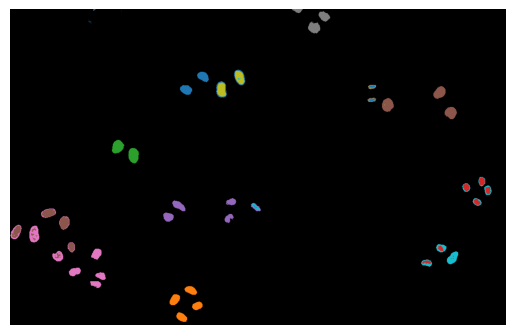

In [6]:
plt.imshow(differentiated_gray_t13)
plt.axis('off')
plt.show()

In [7]:
#save_image_universal(differentiated_gray_t13, 'Images/Segmented_Images/Differentiated_images/t13/t13.png', space='rgb')

To identify how many clusters are optimal we use the elbow method:

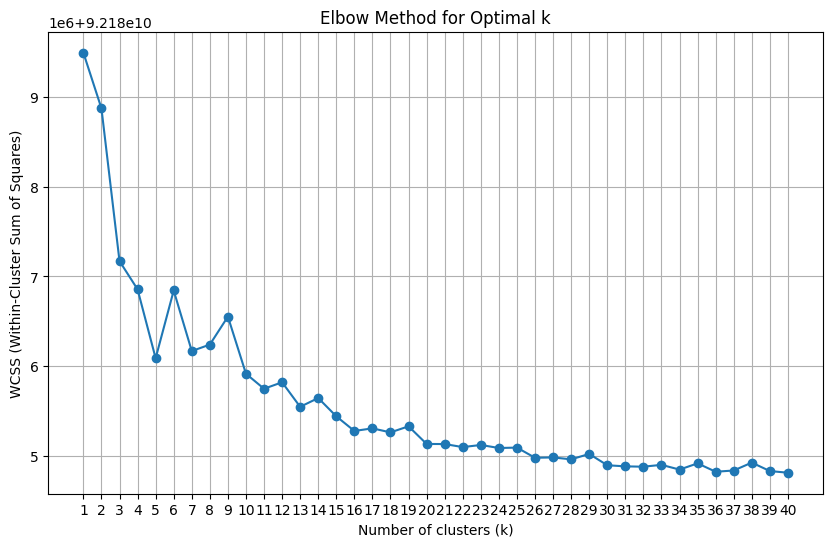

In [8]:
WCSS_gray_t13 = elbow_method_with_coords(gray_t13, max_k=40, init_method='kmeans++', intensity_weight=2, mask_usage=True)
plot_elbow_method(WCSS_gray_t13)

Since the plot doesnt look optimal for identifying the elbow, we use curve_fit to do a "linear regression" with a exponential fuction. With this we are able to identify a realistic elbow without being disturbed by outliers in the plot.

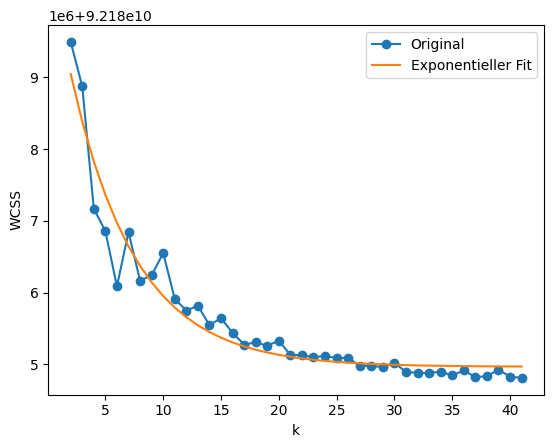

Elbow at k = 12


In [9]:
# Assuming WCSS_gray_t13 contains the WCSS values for k=2 to k=40
ks = np.arange(2, len(WCSS_gray_t13) + 2)

# define the exponential function for curve fitting
def exp_func(k, a, b, c):
    return a * np.exp(b * k) + c

# apply curve fitting
popt, _ = curve_fit(exp_func, ks, WCSS_gray_t13, p0=(WCSS_gray_t13[0], -0.1, WCSS_gray_t13[-1]))

# calculate fit
WCSS_expfit = exp_func(ks, *popt)

# Plot
plt.plot(ks, WCSS_gray_t13, 'o-', label='Original')
plt.plot(ks, WCSS_expfit, '-', label='Exponentieller Fit')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.legend()
plt.show()

# num use function find_elbow
ideal_k = find_elbow(WCSS_expfit)
print("Elbow at k =", ideal_k)

As a result we should use k=13 at the given intensity rate of 2 (can be altered).

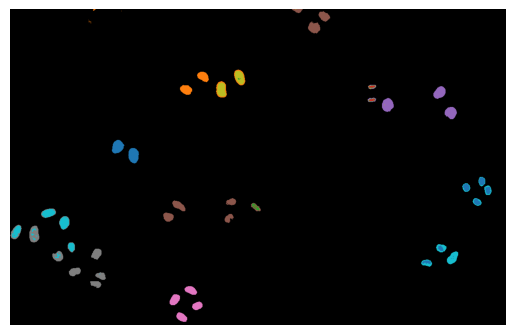

In [14]:
centroids_gray_t13_k13, labels_gray_t13_k13, differentiated_gray_t13_k13 = kmeans_with_coords(gray_t13, k=13, init_method='kmeans++', intensity_weight=2, mask_usage=True)
plt.imshow(differentiated_gray_t13_k13)
plt.axis('off')
plt.show()

In [11]:
#save_image_universal(differentiated_gray_t13_k13, 'Images/Segmented_Images/Differentiated_images/t13/differentiated_gray_t13_k13.png', space='rgb')